___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df.drop(columns= ["RowNumber","Surname"], inplace = True )

In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [ ]:
df.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000,0.005,0.009,-0.015,-0.012,0.017,-0.014,0.002,0.015,-0.006
CreditScore,0.005,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,0.009,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,-0.015,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,-0.012,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.017,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.014,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.002,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,0.015,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.006,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


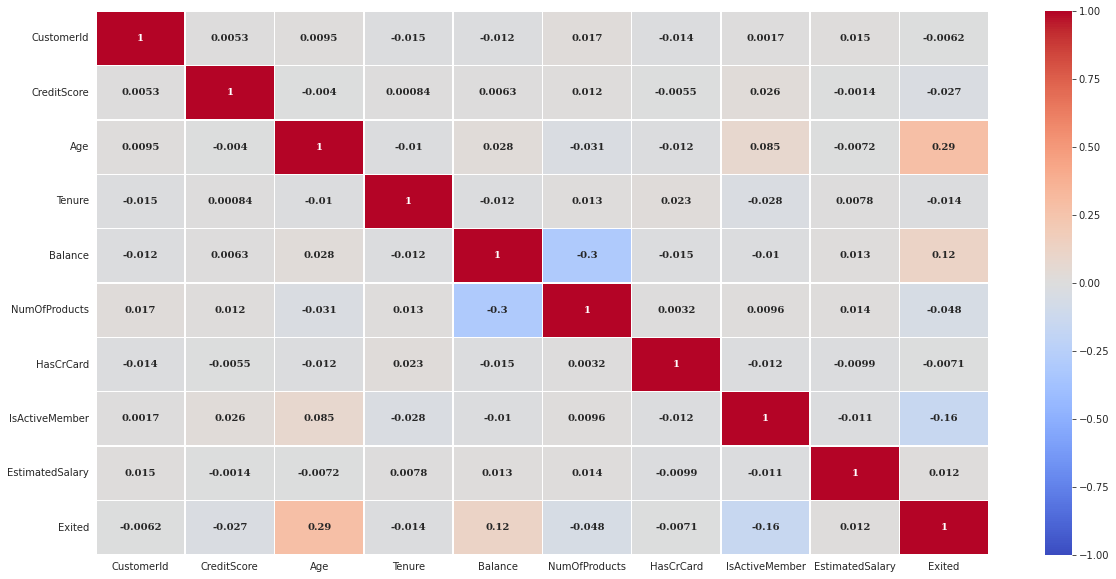

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1,cmap='coolwarm',linewidth=.5,
            annot_kws= {
                        'fontsize': 10,
                        'fontweight': 'bold',
                        'fontfamily': 'serif'
                        });

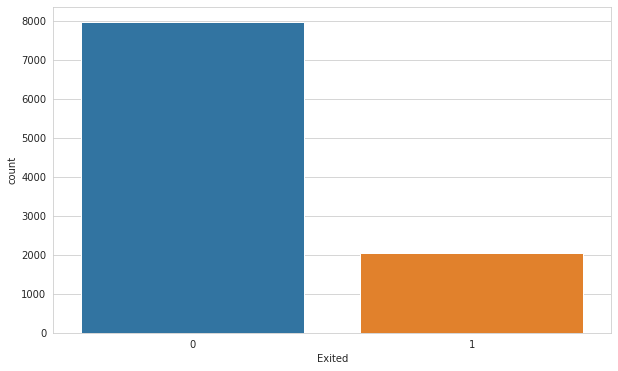

In [ ]:

sns.countplot(data=df, x="Exited"); 


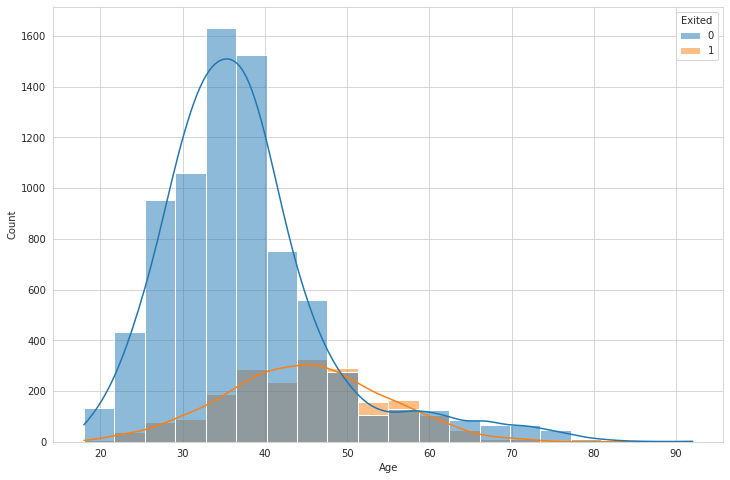

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df,x ="Age",hue="Exited", kde=True, bins=20);

In [ ]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

Geography                     : ['France' 'Spain' 'Germany']
Gender                        : ['Female' 'Male']


In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,15647311,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,15619304,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,15701354,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,15737888,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(["Exited"], axis=1)
y = df["Exited"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
labelencoder_X_1 = LabelEncoder()
labelencoder_X_2 = LabelEncoder()

# Fit the LabelEncoder to the training set
X_train.iloc[:, 3] = labelencoder_X_1.fit_transform(X_train.iloc[:, 3])
X_train.iloc[:, 2] = labelencoder_X_2.fit_transform(X_train.iloc[:, 2])

# Transform the categorical variables in the test set
X_test.iloc[:, 3] = labelencoder_X_1.transform(X_test.iloc[:, 3])
X_test.iloc[:, 2] = labelencoder_X_2.transform(X_test.iloc[:, 2])

In [ ]:
X_train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9069,15777459,619,2,0,32,4,175406.130,2,1,1,172792.430
2603,15583049,643,1,0,34,7,160426.070,1,0,1,188533.110
7738,15768746,561,0,1,33,6,0.000,2,0,0,173680.390
1579,15743976,618,1,1,41,8,37702.790,1,1,1,195775.480
5058,15682322,714,0,1,37,9,148466.930,2,0,1,151280.960


In [ ]:
X_test.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,15687492,596,1,1,32,3,96709.070,2,0,0,41788.370
4684,15736963,623,0,1,43,1,0.000,2,1,1,146379.300
1731,15721730,601,2,0,44,4,0.000,2,1,0,58561.310
4742,15762134,506,1,1,59,8,119152.100,2,1,1,170679.740
4521,15648898,560,2,0,27,7,124995.980,1,1,1,114669.790


In [ ]:
X_train.shape, X_test.shape

((7000, 11), (3000, 11))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Modelling & Model Performance

## without class_weigth

### Create The Model

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [ ]:
X_train.shape[1]

11

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) # input layer with 11 features
model.add(Dense(16, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                384       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(11, 32) dtype=float32, numpy=
 array([[ 0.21564049,  0.33459133, -0.31444997,  0.2523802 , -0.23185647,
         -0.11612883, -0.15088664,  0.14855504,  0.05919215,  0.01249731,
         -0.00116241,  0.3048988 , -0.21758358,  0.15516943, -0.08334801,
          0.04879594,  0.28649908, -0.28594282,  0.09321332, -0.36347315,
         -0.15033571,  0.04109538,  0.07106844,  0.27198267,  0.09363136,
         -0.1819928 , -0.32791802, -0.24131845, -0.28061774, -0.22444661,
          0.2577772 ,  0.2914133 ],
        [-0.251886  ,  0.3343302 , -0.27171153, -0.11052021,  0.00926149,
          0.04798931, -0.01716527,  0.02563664,  0.10758436, -0.22015357,
          0.26814795, -0.34414184, -0.24835177, -0.22183378, -0.3575368 ,
         -0.21877502,  0.33998835,  0.17205143,  0.1989308 ,  0.3264268 ,
          0.16328365, -0.11951667, -0.24846888,  0.35538197, -0.36321416,
         -0.10664845, -0.24764204, -0.12563081,  0.2350406 ,  0.3218271 ,
     

In [ ]:

model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000)


Epoch 1/1000
50/50 [==============================] - 1s 5ms/step - loss: 0.6557 - accuracy: 0.6368 - val_loss: 0.5615 - val_accuracy: 0.7943
Epoch 2/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5205 - accuracy: 0.7922 - val_loss: 0.4900 - val_accuracy: 0.7943
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4962 - accuracy: 0.7922 - val_loss: 0.4800 - val_accuracy: 0.7943
Epoch 4/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.4871 - accuracy: 0.7922 - val_loss: 0.4699 - val_accuracy: 0.7943
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.7922 - val_loss: 0.4596 - val_accuracy: 0.7943
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.7930 - val_loss: 0.4497 - val_accuracy: 0.8043
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7978 - val_loss: 0.4405 - val_accuracy: 0.8029
Epoch 

In [ ]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(11, 32) dtype=float32, numpy=
 array([[ 0.16803835,  0.1685751 , -0.84587187, -0.00793239, -0.5947499 ,
          0.08308396,  0.17417893,  0.36502472,  0.00411154, -0.12924413,
         -0.18702663,  0.5630118 ,  0.1535169 , -0.6868501 ,  0.18189135,
         -0.2087009 ,  0.6531789 ,  0.1263862 , -0.17213683, -0.7296931 ,
          0.09535724,  0.03096161, -0.36422607,  0.21552901,  0.60896605,
          0.5612438 ,  0.07909755,  0.35344642, -0.18713588,  0.4495817 ,
         -0.16020866,  0.41959974],
        [-0.60253876,  0.10089783,  0.34092212,  0.5894145 ,  0.06615918,
         -0.39176828, -0.19123402,  0.78113836, -0.08510195,  0.10012993,
         -0.30916005, -0.3424066 ,  0.14124738, -0.77053344,  0.16966493,
         -0.22974305,  0.41925845,  0.27469248, -0.10353643,  0.5789966 ,
         -0.5198837 ,  0.6267004 ,  0.35461465, -0.6894419 , -0.28696343,
          0.09891941,  0.09985016, -0.47462928, -0.07337611,  0.48893502,
      

In [ ]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.656,0.637,0.561,0.794
1,0.521,0.792,0.490,0.794
2,0.496,0.792,0.480,0.794
3,0.487,0.792,0.470,0.794
4,0.478,0.792,0.460,0.794
...,...,...,...,...
995,0.281,0.883,0.383,0.821
996,0.282,0.882,0.384,0.824
997,0.282,0.883,0.389,0.823
998,0.284,0.880,0.389,0.814


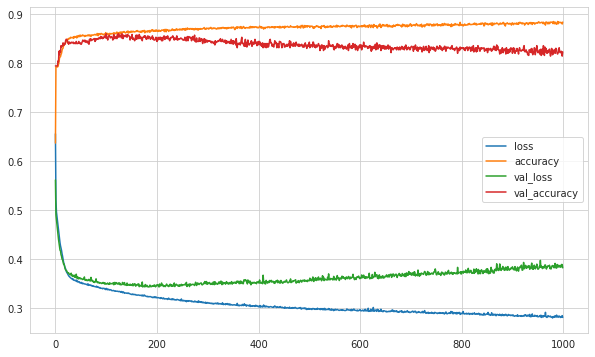

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
model.evaluate(X_train, y_train, verbose=1)

219/219 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8777


[0.2890263795852661, 0.8777142763137817]

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.3555859327316284, 0.8576666712760925]

In [ ]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to binary labels
y_pred = (y_pred > 0.5)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification report
cr = classification_report(y_test, y_pred)

print(cm)
print(cr)


94/94 [==============================] - 0s 1ms/step
[[2248  168]
 [ 259  325]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2416
           1       0.66      0.56      0.60       584

    accuracy                           0.86      3000
   macro avg       0.78      0.74      0.76      3000
weighted avg       0.85      0.86      0.85      3000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) # input layer with 10 features
model.add(Dense(16, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

opt = Adam(lr = 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
model.weights

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

### Add Dropout Layer

### Add Early Stop

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) # input layer with 10 features
model.add(Dense(16, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

opt = Adam(lr = 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___